# Lab 4

## import libs and connect to database

In [98]:
import pandas
import configparser
import psycopg2

In [99]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [100]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [101]:
cur=conn.cursor()

## q1

In [7]:
sql_q1 = """
            select * from gp10.student
            """

In [8]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3\n,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,GS
5,s6@jmu.edu,s6,GS


## q2

In [9]:
sql_q2 = """
        select gp10.professor.p_name,
        gp10.course.c_name
        from gp10.professor
        inner join gp10.course
        on gp10.professor.p_email = gp10.course.p_email
        
        """

In [10]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,kathleen_moore,technology_applications
1,noel_hendrickson,counterfactual_reasoning
2,xuebin_wei,data_mining
3,new_p,new_c_name
4,new_p,introduction_to_national_security


## q3


In [13]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp10.enroll_list
        group by c_number
        order by enrolled desc
        """

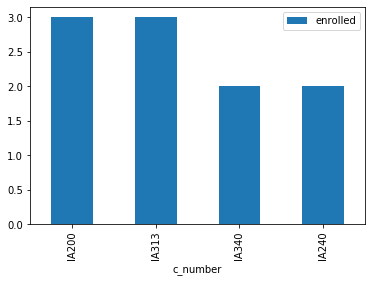

In [15]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [16]:
sql_q4 = """
        select gp10.professor.p_name,
        count(gp10.course.c_name) as teaching_number
        from gp10.professor
        inner join gp10.course
        on gp10.professor.p_email = gp10.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

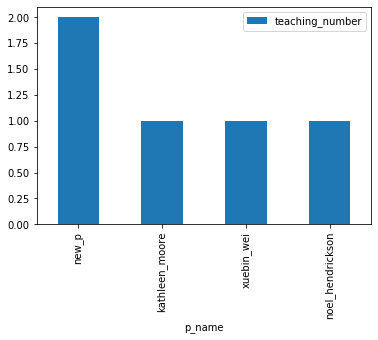

In [18]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [53]:
sql_q5_professor = """
                    insert into gp10.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new2_p@jmu.edu','new_p2','isat123')

In [54]:
cur.execute(sql_q5_professor)

In [56]:
conn.commit()

In [57]:
df=pandas.read_sql_query('select * from gp10.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel_hendrickson,None
1,moore8ka@jmu.edu,kathleen_moore,ISAT116\n
2,weixx@jmu.edu,xuebin_wei,hhs112
3,new_p@jmu.edu,new_p,ISAT200
4,new2_p@jmu.edu,new_p2,isat123


In [102]:
sql_q5_course = """
                insert into gp10.course(c_number,c_name,room,p_email)
                values('{}','{}','{}','{}')
                """.format('ia_new2','new_c_name','online','new2_p@jmu.edu')

In [103]:
cur.execute(sql_q5_course)

In [104]:
conn.commit()

In [107]:
df=pandas.read_sql_query('select * from gp10.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA240,technology_applications,online,moore8ka@jmu.edu
1,IA313,counterfactual_reasoning,online,hendrinx@jmu.edu
2,IA340,data_mining,online,weixx@jmu.edu
3,IA200,introduction_to_national_security,online\n,new_p@jmu.edu
4,ia_new2,new_c_name,online,new2_p@jmu.edu


## q6

In [108]:
sql_q6_course = """
                update gp10.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new2_p@jmu.edu','new3_p@jmu.edu')

In [109]:
cur.execute(sql_q6_course)

In [110]:
conn.commit()

In [112]:
df=pandas.read_sql_query('select * from gp10.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA240,technology_applications,online,moore8ka@jmu.edu
1,IA313,counterfactual_reasoning,online,hendrinx@jmu.edu
2,IA340,data_mining,online,weixx@jmu.edu
3,IA200,introduction_to_national_security,online\n,new_p@jmu.edu
4,ia_new2,new_c_name,online,new2_p@jmu.edu


In [113]:
sql_q6_professor = """
                    delete from gp10.professor
                    where p_email = '{}'
                    """.format('new3_p@jmu.edu')

In [115]:
cur.execute(sql_q6_professor)

In [116]:
conn.commit()

In [117]:
df=pandas.read_sql_query('select * from gp10.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel_hendrickson,None
1,moore8ka@jmu.edu,kathleen_moore,ISAT116\n
2,weixx@jmu.edu,xuebin_wei,hhs112
3,new_p@jmu.edu,new_p,ISAT200
4,new2_p@jmu.edu,new_p2,isat123


## close connection

In [118]:
cur.close()
conn.close()